## Dubai Real Estate Market Analysis & Forecast

### Data Loading

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df= pd.read_csv("transactions.csv")

In [43]:
df.head()

,TRANSACTION_NUMBER,INSTANCE_DATE,GROUP_EN,PROCEDURE_EN,IS_OFFPLAN_EN,IS_FREE_HOLD_EN,USAGE_EN,AREA_EN,PROP_TYPE_EN,PROP_SB_TYPE_EN,...,ACTUAL_AREA,ROOMS_EN,PARKING,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,TOTAL_BUYER,TOTAL_SELLER,MASTER_PROJECT_EN,PROJECT_EN
0,101-2-2026,2026-01-29 18:04:38,Mortgage,Portfolio Mortgage Registration Pre-Registration,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,261.39,3 B/R,2,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Downtown Dubai,0,0,NaN,THE CRESTMARK
1,101-2-2026,2026-01-29 18:04:38,Mortgage,Portfolio Mortgage Registration Pre-Registration,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,572.59,4 B/R,2,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Downtown Dubai,0,0,NaN,THE CRESTMARK
2,101-2-2026,2026-01-29 18:04:38,Mortgage,Portfolio Mortgage Registration Pre-Registration,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,509.08,4 B/R,2,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Downtown Dubai,0,0,NaN,THE CRESTMARK
3,101-2-2026,2026-01-29 18:04:38,Mortgage,Portfolio Mortgage Registration Pre-Registration,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,284.65,4 B/R,2,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Downtown Dubai,0,0,NaN,THE CRESTMARK
4,102-1-2026,2026-01-01 16:21:33,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,Jabal Ali First,Unit,Flat,...,72.41,1 B/R,1,ENERGY Metro Station,Ibn-e-Battuta Mall,Expo 2020 Site,0,0,NaN,Hills View at Wasl Gate


In [45]:
df.columns

Index(['TRANSACTION_NUMBER', 'INSTANCE_DATE', 'GROUP_EN', 'PROCEDURE_EN',
       'IS_OFFPLAN_EN', 'IS_FREE_HOLD_EN', 'USAGE_EN', 'AREA_EN',
       'PROP_TYPE_EN', 'PROP_SB_TYPE_EN', 'TRANS_VALUE', 'PROCEDURE_AREA',
       'ACTUAL_AREA', 'ROOMS_EN', 'PARKING', 'NEAREST_METRO_EN',
       'NEAREST_MALL_EN', 'NEAREST_LANDMARK_EN', 'TOTAL_BUYER', 'TOTAL_SELLER',
       'MASTER_PROJECT_EN', 'PROJECT_EN'],
      dtype='object')

### Data Cleaning & Preparation
##### The dataset required cleaning to ensure numeric consistency.
##### Missing values were handled and key variables were converted into usable numeric form for analysis.

In [109]:
df = df.rename(columns={
    'TRANS_VALUE': 'price',
    'INSTANCE_DATE': 'transaction_date',
    'ACTUAL_AREA': 'size',
    'ROOMS_EN': 'bedrooms',
    'AREA_EN': 'area'
})
df

,TRANSACTION_NUMBER,transaction_date,GROUP_EN,PROCEDURE_EN,IS_OFFPLAN_EN,IS_FREE_HOLD_EN,USAGE_EN,area,PROP_TYPE_EN,PROP_SB_TYPE_EN,...,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,TOTAL_BUYER,TOTAL_SELLER,MASTER_PROJECT_EN,PROJECT_EN,price_per_sqft,bedrooms_numeric,near_metro,month
344,102-10305-2026,2026-01-29 12:24:22,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,Marina Mall,Sports City Swimming Academy,0,0,MAISON ELYSEE III BY PANTHEON,VOXA RESIDENCES,18504.626570,1,1,2026-01
501,102-10447-2026,2026-01-29 14:51:24,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,Marina Mall,Sports City Swimming Academy,0,0,MAISON ELYSEE III BY PANTHEON,VOXA RESIDENCES,22109.716733,1,1,2026-01
510,102-10455-2026,2026-01-29 14:56:17,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,Marina Mall,Sports City Swimming Academy,0,0,MAISON ELYSEE III BY PANTHEON,VOXA RESIDENCES,19242.415684,1,1,2026-01
817,102-10730-2026,2026-01-30 09:34:13,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,DUBAI HILLS,Unit,Flat,...,Mall of the Emirates,Global Village,0,0,Hills Park,399 Hills Park B,20917.178564,1,1,2026-01
1307,102-11176-2026,2026-01-31 10:33:01,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,Marina Mall,Sports City Swimming Academy,0,0,MAISON ELYSEE III BY PANTHEON,VOXA RESIDENCES,11973.417363,4,1,2026-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27734,190-315-2026,2026-01-30 11:21:34,Mortgage,Delayed Mortgage,Ready,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,Ibn-e-Battuta Mall,Sports City Swimming Academy,0,0,JANNAT,Emerald Vision Tower,13379.910361,1,1,2026-01
27912,190-77-2026,2026-01-12 08:53:21,Mortgage,Delayed Mortgage,Ready,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,Ibn-e-Battuta Mall,Sports City Swimming Academy,0,0,JANNAT,Emerald Vision Tower,13208.294809,1,1,2026-01
28645,41-1595-2026,2026-01-27 11:44:10,Sales,Delayed Sell,Ready,Free Hold,Residential,AL FURJAN,Unit,Flat,...,Ibn-e-Battuta Mall,Expo 2020 Site,0,0,Jebel Ali Village Townhouses- Phase 1,AZIZI AMBER,14365.160657,3,1,2026-01
28964,41-1965-2026,2026-01-30 11:21:28,Sales,Delayed Sell,Ready,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,Ibn-e-Battuta Mall,Sports City Swimming Academy,0,0,JANNAT,Emerald Vision Tower,17136.831004,1,1,2026-01


In [59]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df = df.dropna(subset=['price', 'size'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 344 to 29667
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TRANSACTION_NUMBER   106 non-null    object        
 1   transaction_date     106 non-null    datetime64[ns]
 2   GROUP_EN             106 non-null    object        
 3   PROCEDURE_EN         106 non-null    object        
 4   IS_OFFPLAN_EN        106 non-null    object        
 5   IS_FREE_HOLD_EN      106 non-null    object        
 6   USAGE_EN             106 non-null    object        
 7   area                 106 non-null    object        
 8   PROP_TYPE_EN         106 non-null    object        
 9   PROP_SB_TYPE_EN      106 non-null    object        
 10  price                106 non-null    float64       
 11  PROCEDURE_AREA       106 non-null    float64       
 12  size                 106 non-null    float64       
 13  bedrooms             106 non-null   

C:\Users\Irine Susan Issac\AppData\Local\Temp\ipykernel_24376\3858781886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'], errors='coerce')
C:\Users\Irine Susan Issac\AppData\Local\Temp\ipykernel_24376\3858781886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = pd.to_numeric(df['size'], errors='coerce')
C:\Users\Irine Susan Issac\AppData\Local\Temp\ipykernel_24376\3858781886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

### Feature Engineering
##### Price per square foot was created to normalize property comparisons across different sizes.
##### Bedroom labels were converted into numeric values for statistical analysis.

In [63]:
df['price_per_sqft'] = df['price'] / df['size']
df

,TRANSACTION_NUMBER,transaction_date,GROUP_EN,PROCEDURE_EN,IS_OFFPLAN_EN,IS_FREE_HOLD_EN,USAGE_EN,area,PROP_TYPE_EN,PROP_SB_TYPE_EN,...,bedrooms,PARKING,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,TOTAL_BUYER,TOTAL_SELLER,MASTER_PROJECT_EN,PROJECT_EN,price_per_sqft
344,102-10305-2026,2026-01-29 12:24:22,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,1 B/R,1,Nakheel Metro Station,Marina Mall,Sports City Swimming Academy,0,0,MAISON ELYSEE III BY PANTHEON,VOXA RESIDENCES,18504.626570
501,102-10447-2026,2026-01-29 14:51:24,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,1 B/R,1,Nakheel Metro Station,Marina Mall,Sports City Swimming Academy,0,0,MAISON ELYSEE III BY PANTHEON,VOXA RESIDENCES,22109.716733
510,102-10455-2026,2026-01-29 14:56:17,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,1 B/R,1,Nakheel Metro Station,Marina Mall,Sports City Swimming Academy,0,0,MAISON ELYSEE III BY PANTHEON,VOXA RESIDENCES,19242.415684
817,102-10730-2026,2026-01-30 09:34:13,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,DUBAI HILLS,Unit,Flat,...,1 B/R,1,First Abu Dhabi Bank Metro Station,Mall of the Emirates,Global Village,0,0,Hills Park,399 Hills Park B,20917.178564
1307,102-11176-2026,2026-01-31 10:33:01,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,4 B/R,2,Nakheel Metro Station,Marina Mall,Sports City Swimming Academy,0,0,MAISON ELYSEE III BY PANTHEON,VOXA RESIDENCES,11973.417363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27734,190-315-2026,2026-01-30 11:21:34,Mortgage,Delayed Mortgage,Ready,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,1 B/R,G-08,Harbour Tower,Ibn-e-Battuta Mall,Sports City Swimming Academy,0,0,JANNAT,Emerald Vision Tower,13379.910361
27912,190-77-2026,2026-01-12 08:53:21,Mortgage,Delayed Mortgage,Ready,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,1 B/R,P-51,Harbour Tower,Ibn-e-Battuta Mall,Sports City Swimming Academy,0,0,JANNAT,Emerald Vision Tower,13208.294809
28645,41-1595-2026,2026-01-27 11:44:10,Sales,Delayed Sell,Ready,Free Hold,Residential,AL FURJAN,Unit,Flat,...,3 B/R,"P1-12, P1-13",ENERGY Metro Station,Ibn-e-Battuta Mall,Expo 2020 Site,0,0,Jebel Ali Village Townhouses- Phase 1,AZIZI AMBER,14365.160657
28964,41-1965-2026,2026-01-30 11:21:28,Sales,Delayed Sell,Ready,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,1 B/R,G-08,Harbour Tower,Ibn-e-Battuta Mall,Sports City Swimming Academy,0,0,JANNAT,Emerald Vision Tower,17136.831004


In [65]:
import re

def clean_rooms(room):
    if pd.isna(room): return 0
    room = str(room).upper()
    if 'STUDIO' in room: return 0
    match = re.search(r'(\d+)', room)
    return int(match.group(1)) if match else 0

df['bedrooms_numeric'] = df['bedrooms'].apply(clean_rooms)

In [67]:
df['bedrooms_numeric']

344      1
501      1
510      1
817      1
1307     4
        ..
27734    1
27912    1
28645    3
28964    1
29667    1
Name: bedrooms_numeric, Length: 106, dtype: int64

In [71]:
df['near_metro'] = df['NEAREST_METRO_EN'].notna().astype(int)
df['near_metro']

344      1
501      1
510      1
817      1
1307     1
        ..
27734    1
27912    1
28645    1
28964    1
29667    1
Name: near_metro, Length: 106, dtype: int32

### Area Price Comparison
##### Premium areas were compared to identify geographic pricing differences.
##### This helps evaluate the importance of location in market valuation.

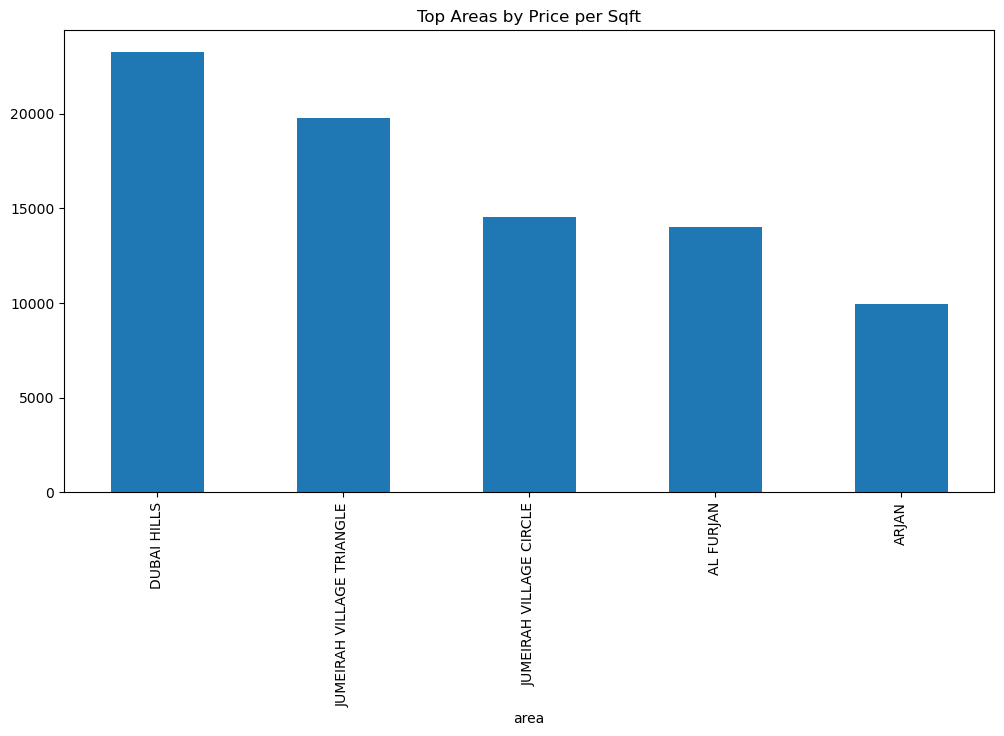

In [75]:
area_price = df.groupby('area')['price_per_sqft'].mean().sort_values(ascending=False)

area_price.head(10).plot(kind='bar', figsize=(12,6))
plt.title('Top Areas by Price per Sqft')
plt.show()

### Correlation Analysis
##### A correlation matrix was used to identify which property features influence price most strongly.
##### This provides statistical evidence behind pricing drivers.

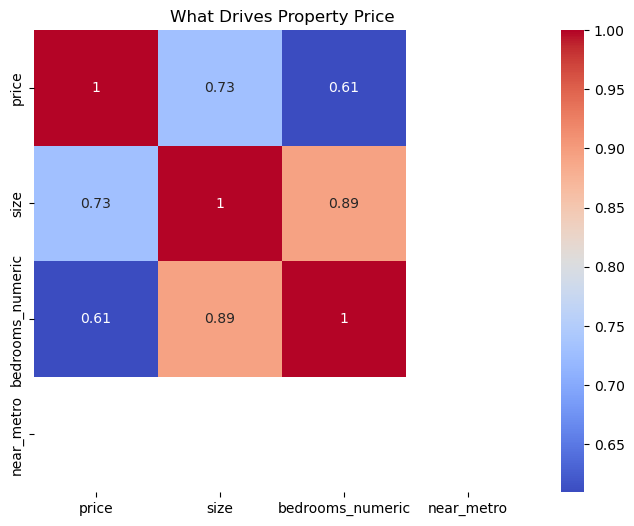

In [77]:
corr_cols = ['price', 'size', 'bedrooms_numeric', 'near_metro']

plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('What Drives Property Price')
plt.show()

### Market Trend & Forecast
##### A simple linear regression model was used to estimate short-term pricing trends.
##### The goal is directional insight rather than precise financial prediction.

C:\Users\Irine Susan Issac\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


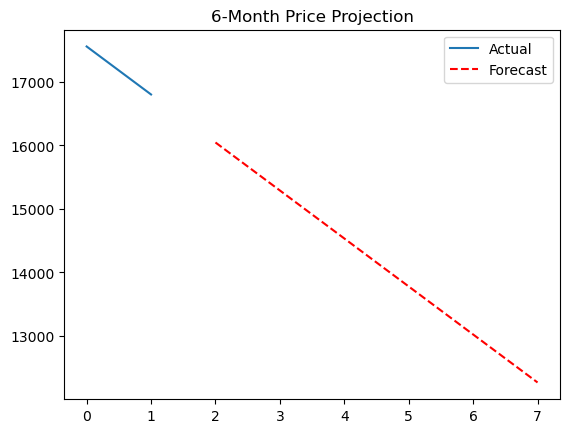

In [79]:
df['month'] = df['transaction_date'].dt.to_period('M')

monthly = df.groupby('month')['price_per_sqft'].mean().reset_index()
monthly['time_index'] = np.arange(len(monthly))

from sklearn.linear_model import LinearRegression

X = monthly[['time_index']]
y = monthly['price_per_sqft']

model = LinearRegression().fit(X, y)

future = np.arange(len(monthly), len(monthly)+6).reshape(-1,1)
forecast = model.predict(future)

plt.plot(monthly['time_index'], y, label='Actual')
plt.plot(range(len(monthly), len(monthly)+6), forecast, '--r', label='Forecast')
plt.legend()
plt.title('6-Month Price Projection')
plt.show()

## Key Insights
##### The comparison of premium areas shows clear pricing differences, confirming that location is a major driver of property value in Dubai. High demand zones maintain consistently higher price per square foot.
##### The correlation analysis indicates that property size has the strongest relationship with transaction price, followed by number of bedrooms. Metro proximity has a smaller effect compared to structural property features.
##### Feature engineering (price per square foot) allowed fair comparison across properties of different sizes, revealing pricing efficiency rather than raw sale value.
##### The monthly trend analysis suggests a short-term softening in average price per square foot, as reflected in the regression projection. This indicates a potential cooling or market correction phase.
##### The forecast model is intentionally simple and designed to show directional trend rather than exact prediction. Real market forecasting would require macroeconomic variables, interest rates, and seasonal adjustments.